lamda 2: Epoch 0 Loss: 0.1343
lamda 2: Epoch 1 Loss: 0.1201
lamda 2: Epoch 2 Loss: 0.1160
lamda 2: Epoch 3 Loss: 0.1090
lamda 2: Epoch 4 Loss: 0.1138
lamda 2: Epoch 5 Loss: 0.1147
lamda 2: Epoch 6 Loss: 0.1158
lamda 2: Epoch 7 Loss: 0.1032
lamda 2: Epoch 8 Loss: 0.1050
lamda 2: Epoch 9 Loss: 0.1108
lamda 2: Epoch 10 Loss: 0.1046
lamda 2: Epoch 11 Loss: 0.1084
lamda 2: Epoch 12 Loss: 0.1076
lamda 2: Epoch 13 Loss: 0.1001
lamda 2: Epoch 14 Loss: 0.1118
lamda 2: Epoch 15 Loss: 0.1048
lamda 2: Epoch 16 Loss: 0.1076
lamda 2: Epoch 17 Loss: 0.1044
lamda 2: Epoch 18 Loss: 0.1044
lamda 2: Epoch 19 Loss: 0.1081
lamda 2: Epoch 20 Loss: 0.0972
lamda 2: Epoch 21 Loss: 0.1011
lamda 2: Epoch 22 Loss: 0.1093
lamda 2: Epoch 23 Loss: 0.1075
lamda 2: Epoch 24 Loss: 0.1050
lamda 2: Epoch 25 Loss: 0.1035
lamda 2: Epoch 26 Loss: 0.1082
lamda 2: Epoch 27 Loss: 0.1013
lamda 2: Epoch 28 Loss: 0.1083
lamda 2: Epoch 29 Loss: 0.1048
lamda 2: Epoch 30 Loss: 0.1036
lamda 2: Epoch 31 Loss: 0.1032
lamda 2: Epoch 32 

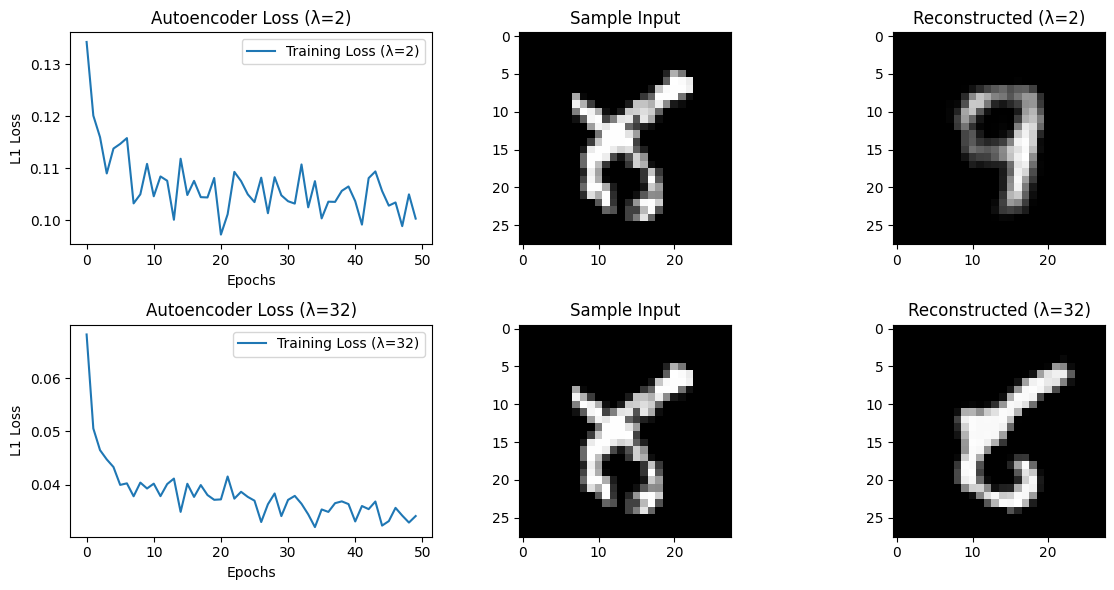

In [1]:
# use activation function ReLu, L1 loss function and adam optimizer and train the autoencoder on the MNIST training dataset, make an autoencoder for the MNIST data set with convolutional layers following the CNN arcchitectures below:
# Input 1x28×28 → 16x28x28 → 16x14x14 →  8x14x14 → 8x7x7 → 392 → 2 → 392→ 8x7x7 → 8x14x14 →16x14x14 →16x28x28  → 1x28 × 28  
# Input 1x28×28 → 16x28x28 → 16x14x14 →  8x14x14 → 8x7x7 → 392 → 32 → 392→ 8x7x7 → 8x14x14 →16x14x14 →16x28x28  → 1x28 × 28  
# For both the scenarios, submit the training loss vs epochs, sample input image and the reconstructed output image
# print out all the latent space

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the Convolutional Autoencoder model class
class ConvAutoencoder(nn.Module):
    def __init__(self, lambda_value):
        super(ConvAutoencoder, self).__init__()
        self.lambda_value = lambda_value
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # 1x28x28 -> 16x28x28
            nn.ReLU(),
            nn.MaxPool2d(2),  # 16x28x28 -> 16x14x14
            nn.Conv2d(16, 8, kernel_size=3, padding=1),  # 16x14x14 -> 8x14x14
            nn.ReLU(),
            nn.MaxPool2d(2)  # 8x14x14 -> 8x7x7
        )
        # Bottleneck layer
        self.bottleneck = nn.Sequential(
            nn.Flatten(),  # 8x7x7 => 392
            nn.Linear(392, lambda_value),  # Lambda
            nn.ReLU()
        )
        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(lambda_value, 392),  # Lambda => 392
            nn.ReLU(),
            nn.Unflatten(1, (8, 7, 7)),  # 392 => 8x7x7
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 8x7x7 => 16x14x14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 16x14x14 => 16x28x28
            nn.ReLU(),
            nn.Conv2d(16, 1, kernel_size=3, padding=1),  # 16x28x28 => 1x28x28
            #nn.ReLU()  
        )

    def forward(self, x):
        encoded = self.encoder(x)
        encoded = self.bottleneck(encoded)
        decoded = self.decoder(encoded)
        return decoded

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

# Instantiate the autoencoder for λ = 2 and λ = 32
autoencoder_lambda_2 = ConvAutoencoder(lambda_value=2)
autoencoder_lambda_32 = ConvAutoencoder(lambda_value=32)

# Define the loss function (L1 loss) and optimizer (Adam)
criterion = nn.L1Loss()
optimizer_lambda_2 = optim.Adam(autoencoder_lambda_2.parameters(), lr=0.001)
optimizer_lambda_32 = optim.Adam(autoencoder_lambda_32.parameters(), lr=0.001)

# Training loop for λ = 2
num_epochs = 50
losses_lambda_2 = []

for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        optimizer_lambda_2.zero_grad()
        outputs = autoencoder_lambda_2(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer_lambda_2.step()
    print(f'lamda 2: Epoch {epoch} Loss: {loss.item():.4f}')
    losses_lambda_2.append(loss.item())

# Training loop for λ = 32
losses_lambda_32 = []

for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        optimizer_lambda_32.zero_grad()
        outputs = autoencoder_lambda_32(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer_lambda_32.step()
    print(f'lamda 32: Epoch {epoch} Loss: {loss.item():.4f}')
    losses_lambda_32.append(loss.item())

# Plot training loss vs epochs for both scenarios
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.plot(losses_lambda_2, label='Training Loss (λ=2)')
plt.xlabel('Epochs')
plt.ylabel('L1 Loss')
plt.legend()
plt.title('Autoencoder Loss (λ=2)')

plt.subplot(2, 3, 4)
plt.plot(losses_lambda_32, label='Training Loss (λ=32)')
plt.xlabel('Epochs')
plt.ylabel('L1 Loss')
plt.legend()
plt.title('Autoencoder Loss (λ=32)')


# Display sample input and reconstructed output images for both scenarios
sample_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
sample_images, _ = next(iter(sample_loader))

sample_output_lambda_2 = autoencoder_lambda_2(sample_images)
sample_output_lambda_32 = autoencoder_lambda_32(sample_images)

plt.subplot(2, 3, 2)
plt.imshow(sample_images[0][0], cmap='gray')
plt.title('Sample Input')

plt.subplot(2, 3, 3)
plt.imshow(sample_output_lambda_2[0][0].detach().numpy(), cmap='gray')
plt.title('Reconstructed (λ=2)')

plt.subplot(2, 3, 5)
plt.imshow(sample_images[0][0], cmap='gray')
plt.title('Sample Input')

plt.subplot(2, 3, 6)
plt.imshow(sample_output_lambda_32[0][0].detach().numpy(), cmap='gray')
plt.title('Reconstructed (λ=32)')
plt.tight_layout()
plt.show()


In [ ]:
PATH = './A2Q2_2_optimizer_lambda_2.pth'
torch.save(optimizer_lambda_2.state_dict(), PATH)
PATH = './A2Q2_2_optimizer_lambda_32.pth'
torch.save(optimizer_lambda_32.state_dict(), PATH)